In [1]:
import valenspy as vp

In [2]:
manager = vp.InputManager(machine='hortense')

In [3]:
ds = manager.load_data("ERA5",["tas", "pr"], period=[2000],freq="daily",region="europe", path_identifiers=["min"])
ds

File paths found:
/dodrio/scratch/projects/2022_200/external/era5/europe/2m_temperature/daily/era5-daily-europe-2m_temperature_min-2000.nc
The file is ValEnsPy CF compliant.
50.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds']


<xarray.Dataset> Size: 138MB
Dimensions:    (time: 366, bnds: 2, lon: 289, lat: 163)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2000-01-01T11:00:00 ... 2000-12-31T1...
  * lon        (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * lat        (lat) float32 652B 33.0 33.25 33.5 33.75 ... 73.0 73.25 73.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(366, 2), meta=np.ndarray>
    tas        (time, lat, lon) float64 138MB dask.array<chunksize=(362, 81, 144), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 2.4.0 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Fri Aug 30 00:30:50 2024: cdo -z zip daymin /dodrio/sc...
    frequency:         day
    CDO:               Climate Data Operators version 2.4.0 (https://mpimet.m...
    period:            2000
    freq:              daily
    region:            europe
    path_identifiers:  ['min']
    dataset:           ERA5

In [4]:
ds

<xarray.Dataset> Size: 138MB
Dimensions:    (time: 366, bnds: 2, lon: 289, lat: 163)
Coordinates:
  * time       (time) datetime64[ns] 3kB 2000-01-01T11:00:00 ... 2000-12-31T1...
  * lon        (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * lat        (lat) float32 652B 33.0 33.25 33.5 33.75 ... 73.0 73.25 73.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 6kB dask.array<chunksize=(366, 2), meta=np.ndarray>
    tas        (time, lat, lon) float64 138MB dask.array<chunksize=(362, 81, 144), meta=np.ndarray>
Attributes:
    CDI:               Climate Data Interface version 2.4.0 (https://mpimet.m...
    Conventions:       CF-1.6
    history:           Fri Aug 30 00:30:50 2024: cdo -z zip daymin /dodrio/sc...
    frequency:         day
    CDO:               Climate Data Operators version 2.4.0 (https://mpimet.m...
    period:            2000
    freq:              daily
    region:            europe
    path_identifiers:  ['min']
    dataset:           ERA5

# Calculate the UHI
## Time series

<Axes: title={'center': 'lon = 3.75 [degrees_east]'}, xlabel='time', ylabel='Near-Surface Air Temperature\n[K]'>

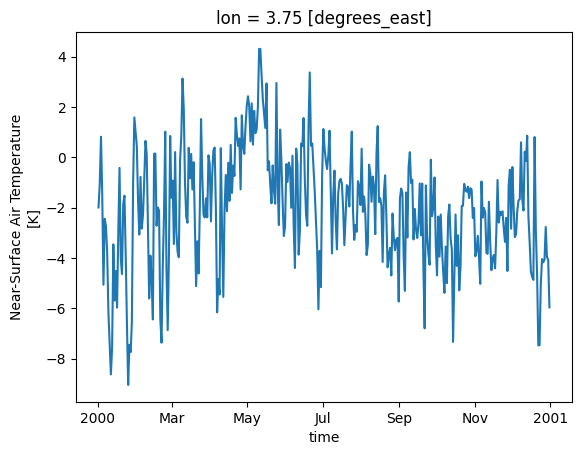

In [6]:
from valenspy.diagnostic import UrbanHeatIsland, UrbanHeatIslandDiurnalCycle 

#Two unrealistic far points (needed for illustration purposes as the res of ERA5 is too low)
urban_gent = (3.728, 51.051) 
rural_gent = (3.816, 52.980) 

uhi = UrbanHeatIsland.apply(ds, urban_coord=urban_gent, rural_coord=rural_gent)
UrbanHeatIsland.plot(uhi.tas, title=f"UHI Gent {urban_gent} - {rural_gent}")

## Diurnal cycle

In [7]:
ds = manager.load_data("ERA5",["tas", "pr"], period=[2000],freq="hourly",region="europe")
ds

File paths found:
/dodrio/scratch/projects/2022_200/external/era5/europe/total_precipitation/hourly/era5-hourly-europe-total_precipitation-2000.nc
/dodrio/scratch/projects/2022_200/external/era5/europe/2m_temperature/hourly/era5-hourly-europe-2m_temperature-2000.nc
The file is ValEnsPy CF compliant.
100.00% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas', 'pr']


<xarray.Dataset> Size: 7GB
Dimensions:  (lon: 289, lat: 163, time: 8784)
Coordinates:
  * lon      (lon) float32 1kB -27.0 -26.75 -26.5 -26.25 ... 44.5 44.75 45.0
  * lat      (lat) float32 652B 33.0 33.25 33.5 33.75 ... 72.75 73.0 73.25 73.5
  * time     (time) datetime64[ns] 70kB 2000-01-01 ... 2000-12-31T23:00:00
Data variables:
    tas      (time, lat, lon) float64 3GB dask.array<chunksize=(3079, 54, 96), meta=np.ndarray>
    pr       (time, lat, lon) float64 3GB dask.array<chunksize=(3079, 54, 96), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.6
    history:           2020-02-19 03:20:19 GMT by grib_to_netcdf-2.16.0: /opt...
    period:            2000
    freq:              hourly
    region:            europe
    path_identifiers:  ['min']
    dataset:           ERA5

<Axes: title={'center': 'lon = 3.75 [degrees_east]'}, xlabel='hour', ylabel='Near-Surface Air Temperature\n[K]'>

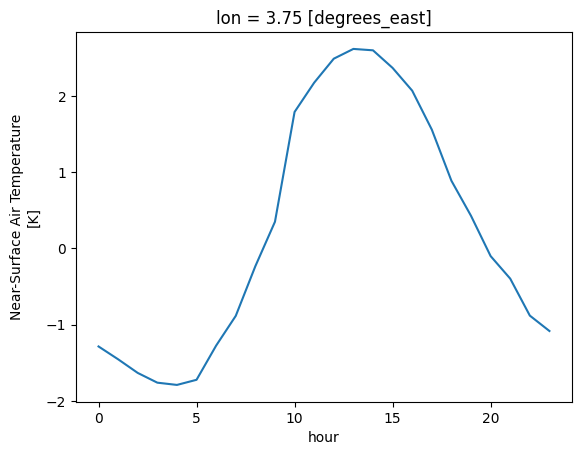

In [8]:
uhi_dc = UrbanHeatIslandDiurnalCycle.apply(ds, urban_coord=urban_gent, rural_coord=rural_gent)
UrbanHeatIslandDiurnalCycle.plot(uhi_dc.tas)